# Network #4

## Inputs:  

Year
Month
Day
Hour
A 22 length vector, with each column corresponding to a neighbourhood. (One hot encoded)

## Outputs:

Each value in the output vector coressponds to the likelihood of crime in the corresponding neighbourhood 

### Extracting Data

In [1]:
import pandas as pd

# File loaded from Github Repo
file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/final_crime.csv'

df = pd.read_csv(file_path)
print("Shape of Original Dataset : " + str(df.shape))

df = df[pd.isnull(df['NEIGHBOURHOOD']) != pd.isnull(pd.NaT)]
print("Shape of Dataset without Invalid points: " + str(df.shape))

df = df[['YEAR','MONTH','DAY','HOUR', 'Neighbourhood']] 
print("Shape of Dataset we are using: " + str(df.shape) + "\n")

print("Sample row")
df.head(1)

Shape of Original Dataset : (480724, 16)
Shape of Dataset without Invalid points: (428141, 16)
Shape of Dataset we are using: (428141, 5)

Sample row


,YEAR,MONTH,DAY,HOUR,Neighbourhood
0,2004,10,8,21.0,Fairview


In [2]:
# Creating a Key which will be a Date/Time object

print ("------ Adding date-time object as key ------\n")
date_time_col = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# Make the added Date the index of the dataset
df['DateTimeMix'] = date_time_col
df.set_index('DateTimeMix', inplace=True)

print("Sample row")
df.head(1)

------ Adding date-time object as key ------

Sample row


,YEAR,MONTH,DAY,HOUR,Neighbourhood
DateTimeMix,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,Fairview


In [3]:
# Import a list of all neighbourhoods in Vancouver

nb_file_path = 'https://raw.githubusercontent.com/NasirKhalid24/ELE494-Project/master/Datasets/cov_localareas.csv'

neighbourhoods = pd.read_csv(nb_file_path)
neighbourhoods = neighbourhoods['NAME']
print("List of Neighbourhoods : ")
neighbourhoods

List of Neighbourhoods : 


0                       Sunset
1               Mount Pleasant
2                   Riley Park
3                     Downtown
4                    Kitsilano
5            Dunbar-Southlands
6                   Kerrisdale
7                Arbutus-Ridge
8              West Point Grey
9                      Marpole
10                    Oakridge
11                 Shaughnessy
12                    Fairview
13                South Cambie
14                    West End
15                   Killarney
16         Renfrew-Collingwood
17            Hastings-Sunrise
18         Victoria-Fraserview
19    Kensington-Cedar Cottage
20                  Strathcona
21          Grandview-Woodland
Name: NAME, dtype: object

In [4]:
# For each neighbourhood add a column and set it's value to 1 if the row is a crime in the neighbourhood
new_cols = pd.get_dummies(df['Neighbourhood'])

# Drop the column for Neighbourhood
df = df.drop(columns="Neighbourhood")

# Concatenate the one hot encoded neighbourhoods
df = pd.concat([df,new_cols], axis=1)

df.head(5)

,YEAR,MONTH,DAY,HOUR,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
DateTimeMix,,,,,,,,,,,,,,,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-07-30 07:00:00,2004,7,30,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2004-10-08 21:00:00,2004,10,8,21.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-06-12 23:00:00,2004,6,12,23.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-16 00:00:00,2004,1,16,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Sort by date-time and remove duplicates
df = df.sort_values(by='DateTimeMix')
df = df.drop_duplicates()

# Extract the year, month, day, hour input arrays for network
X = df[['YEAR', 'MONTH', 'DAY', 'HOUR']]
X = X.drop_duplicates().values

df.head(5)

,YEAR,MONTH,DAY,HOUR,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
DateTimeMix,,,,,,,,,,,,,,,,,,,,,
2004-01-01,2004,1,1,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Do a bit wise OR for a single Date and Time so that we only have unique Date/Time rows
# For example in the one above there are 5 different rows for the same date and time

df = df.groupby(['YEAR','MONTH', 'DAY', 'HOUR']).sum()
df.head(5)

Arbutus-Ridge  Downtown  Dunbar-Southlands  Fairview  \
YEAR MONTH DAY HOUR                                                         
2004 1     1   0.0               0         1                  0         0   
               1.0               0         0                  0         0   
               2.0               0         0                  0         0   
               3.0               0         1                  1         0   
               4.0               0         0                  0         0   

                     Grandview-Woodland  Hastings-Sunrise  \
YEAR MONTH DAY HOUR                                         
2004 1     1   0.0                    0                 0   
               1.0                    0                 0   
               2.0                    0                 0   
               3.0                    0                 0   
               4.0                    0                 0   

                     Kensington-Cedar Cottage  Kerrisdale  Killarney  \
YEAR MONTH DAY HOUR                                                    
2004 1     1   0.0                          0           1          1   
               1.0                          0           0          0   
               2.0                          0           0          0   
               3.0                          1           0          0   
               4.0                          0           0          0   

                     Kitsilano  ...  Oakridge  Renfrew-Collingwood  \
YEAR MONTH DAY HOUR             ...                                  
2004 1     1   0.0           1  ...         0                    0   
               1.0           0  ...         0                    0   
               2.0           0  ...         0                    0   
               3.0           0  ...         0                    0   
               4.0           0  ...         0                    0   

                     Riley Park  Shaughnessy  South Cambie  Strathcona  \
YEAR MONTH DAY HOUR                                                      
2004 1     1   0.0            0            0             0           1   
               1.0            1            0             0           1   
               2.0            0            0             0           0   
               3.0            0            0             0           1   
               4.0            0            0             0           1   

                     Sunset  Victoria-Fraserview  West End  West Point Grey  
YEAR MONTH DAY HOUR                                                          
2004 1     1   0.0        1                    1         0                1  
               1.0        0                    0         0                0  
               2.0        1                    0         0                0  
               3.0        0                    0         1                0  
               4.0        0                    0         0                0  

[5 rows x 22 columns]

In [0]:
# Get the output array (one hot encoded neighbourhoods)
Y = df.values

### Splitting Data, Normalizing Data & Defining Functions

In [0]:
# X is input
# Y is output

In [9]:
X[3]

array([2.004e+03, 1.000e+00, 1.000e+00, 3.000e+00])

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)
X = scaler.transform(X)
print(X[3])

[0.         0.         0.         0.13043478]


In [11]:
Y[3]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=uint8)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print("Training Data Size: " + str(X_train.shape))
print("Testing Data Size:" + str(X_test.shape))
print("Training Label Size: " + str(Y_train.shape))
print("Testing Label Size: " + str(Y_test.shape))

Training Data Size: (72195, 4)
Testing Data Size:(35560, 4)
Training Label Size: (72195, 22)
Testing Label Size: (35560, 22)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot loss and accuracy vs epochs
def loss_curve(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  x_axis     = range(1, len(history.history['loss'])+1)
  
  plt.figure()
  plt.plot(x_axis, train_loss, label="Training Loss")
  plt.plot(x_axis, val_loss, label="Validation Loss")
  plt.ylabel('Loss Value')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Loss')
  plt.legend()
  
def accuracy(history):
  acc  = history.history['acc']
  val_acc = history.history['val_acc']
  x_axis     = range(1, len(history.history['acc'])+1)
  
  plt.figure()
  plt.plot(x_axis, np.dot(acc,100), label="Accuracy")
  plt.plot(x_axis, np.dot(val_acc, 100), label="Validation Accuracy")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Epochs vs Accuracy')
  plt.legend()

### Training Network and Results

In [32]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(32, activation='tanh', input_shape=(X_train.shape[1], ) ) )
model.add(Dense(64, activation='tanh') )
model.add(Dense(32, activation='tanh') )


model.add(Dense(Y_train.shape[1], activation='sigmoid') )

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 22)                726       
Total params: 5,078
Trainable params: 5,078
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_train, Y_train,
          epochs = 40,
          batch_size=128,
          validation_split=0.2,
          verbose = 1)

Train on 57756 samples, validate on 14439 samples
Epoch 1/40
57756/57756 [==============================] - 2s 34us/step - loss: 0.3768 - acc: 0.8571 - val_loss: 0.3642 - val_acc: 0.8606
Epoch 2/40
57756/57756 [==============================] - 1s 25us/step - loss: 0.3638 - acc: 0.8612 - val_loss: 0.3628 - val_acc: 0.8614
Epoch 3/40
57756/57756 [==============================] - 1s 25us/step - loss: 0.3626 - acc: 0.8612 - val_loss: 0.3619 - val_acc: 0.8615
Epoch 4/40
57756/57756 [==============================] - 1s 25us/step - loss: 0.3618 - acc: 0.8613 - val_loss: 0.3610 - val_acc: 0.8615
Epoch 5/40
57756/57756 [==============================] - 1s 25us/step - loss: 0.3614 - acc: 0.8613 - val_loss: 0.3610 - val_acc: 0.8613
Epoch 6/40
57756/57756 [==============================] - 1s 25us/step - loss: 0.3613 - acc: 0.8614 - val_loss: 0.3609 - val_acc: 0.8615
Epoch 7/40
57756/57756 [==============================] - 1s 25us/step - loss: 0.3611 - acc: 0.8613 - val_loss: 0.3603 - val_acc

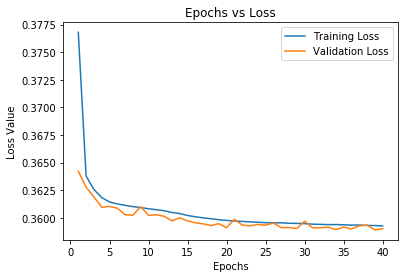

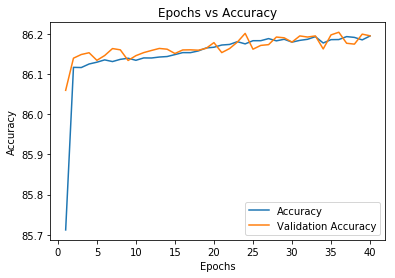

In [38]:
loss_curve(history)
accuracy(history)

In [39]:
print("Evaluating on Test Dataset")
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Evaluating on Test Dataset
acc: 86.15%


In [40]:
# Predicting for random year/month/day/hour

ans = model.predict(np.array([[2019, 2, 11, 1]]))
ans

array([[0.16553745, 0.7874076 , 0.09358478, 0.46398166, 0.36022896,
        0.30427074, 0.19909623, 0.09764177, 0.19673851, 0.21945325,
        0.12287965, 0.41412646, 0.25304464, 0.31223658, 0.24779451,
        0.06567723, 0.17815265, 0.4638296 , 0.3113088 , 0.17905569,
        0.47154552, 0.08937451]], dtype=float32)

In [42]:
# Predicting for another random year/month/day/hour

ans = model.predict(np.array([[2015, 2, 7, 12]]))
ans

array([[0.16553745, 0.7874076 , 0.09358478, 0.46398166, 0.36022896,
        0.30427074, 0.19909623, 0.09764177, 0.19673851, 0.21945325,
        0.12287965, 0.41412646, 0.25304464, 0.31223658, 0.24779451,
        0.06567723, 0.17815265, 0.4638296 , 0.3113088 , 0.17905569,
        0.47154552, 0.08937451]], dtype=float32)